In [115]:
import pandas as pd

In [116]:
filmes = pd.read_csv('ml-latest-small/movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes = filmes.set_index('filmeId')

filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [117]:
notas = pd.read_csv('ml-latest-small/ratings.csv')
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [118]:
notas.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


# Primeira tentativa de recomendação

In [119]:
total_de_votos = notas['filmeId'].value_counts()
total_de_votos.head()

356     329
318     317
296     307
593     279
2571    278
Name: filmeId, dtype: int64

In [120]:
filmes['total_de_votos'] = total_de_votos
filmes.head()

,titulo,generos,total_de_votos
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,110.0
3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
5,Father of the Bride Part II (1995),Comedy,49.0


In [121]:
filmes.sort_values('total_de_votos', ascending=False).head(10)

,titulo,generos,total_de_votos
filmeId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0
110,Braveheart (1995),Action|Drama|War,237.0
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0


In [122]:
notas_medias = notas.groupby('filmeId').mean()['nota']
notas_medias.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [123]:
filmes['nota_media'] = notas_medias
filmes.head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0,2.357143
5,Father of the Bride Part II (1995),Comedy,49.0,3.071429
6,Heat (1995),Action|Crime|Thriller,102.0,3.946078
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
8,Tom and Huck (1995),Adventure|Children,8.0,2.875000
9,Sudden Death (1995),Action,16.0,3.125000


In [124]:
filmes.sort_values('nota_media', ascending=False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,1.0,5.0
100556,"Act of Killing, The (2012)",Documentary,1.0,5.0
143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
143511,Human (2015),Documentary,1.0,5.0
143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,1.0,5.0
6201,Lady Jane (1986),Drama|Romance,1.0,5.0
102217,Bill Hicks: Revelations (1993),Comedy,1.0,5.0
102084,Justice League: Doom (2012),Action|Animation|Fantasy,1.0,5.0
6192,Open Hearts (Elsker dig for evigt) (2002),Romance,1.0,5.0


In [125]:
filmes_com_mais_de_50_votos = filmes.query('total_de_votos >= 50')
filmes_com_mais_de_50_votos.head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615
6,Heat (1995),Action|Crime|Thriller,102.0,3.946078
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
11,"American President, The (1995)",Comedy|Drama|Romance,70.0,3.671429
16,Casino (1995),Crime|Drama,82.0,3.926829
17,Sense and Sensibility (1995),Drama|Romance,67.0,3.776119


In [126]:
filmes_com_mais_de_50_votos.sort_values('nota_media', ascending=False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
1213,Goodfellas (1990),Crime|Drama,126.0,4.250000


# Recomendação por comparação de gênero

In [127]:
eu_assisti = [1, 21, 19, 10, 11, 7, 2]
filmes.loc[eu_assisti]

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382
19,Ace Ventura: When Nature Calls (1995),Comedy,88.0,2.727273
10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
11,"American President, The (1995)",Comedy|Drama|Romance,70.0,3.671429
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


In [128]:
aventura_infantil_e_fantasia = filmes_com_mais_de_50_votos.query('generos == \'Adventure|Children|Fantasy\'')
aventura_infantil_e_fantasia.drop(eu_assisti, errors='ignore').sort_values('nota_media', ascending=False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548


* Tipos de filtro: Collaborative filtering x Content-based filtering<br>
https://en.wikipedia.org/wiki/Recommender_system

# Procurar usuários similares

- João deu nota 4 para Toy Story
- Maria deu nota 5 para Toy Story
- Paulo deu nota 3 para Toy Story
- Joana deu nota 3.5 para Toy Story

distância = x - y<br>
distância euclidiana = raíz((x1 - x2)^2 + (y1 - y2)^2)

In [129]:
import matplotlib.pyplot as plt

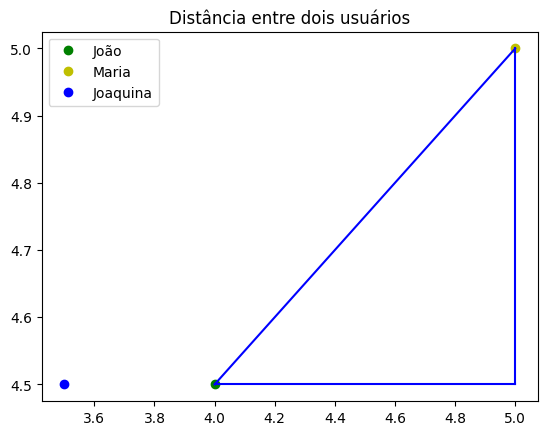

In [130]:
plt.plot(4, 4.5, 'go')
plt.plot(5, 5, 'yo')
plt.plot(3.5, 4.5, 'bo')
plt.legend(['João', 'Maria', 'Joaquina'])
plt.title('Distância entre dois usuários')

plt.plot([4, 5], [4.5, 4.5], linestyle='-', color='blue')
plt.plot([4, 5], [4.5, 5], linestyle='-', color='blue')
plt.plot([5, 5], [4.5, 5], linestyle='-', color='blue')

In [131]:
import numpy as np

In [132]:
joao = np.array([4, 4.5])
maria = np.array([5, 5])

joao - maria

array([-1. , -0.5])

In [133]:
def pitagoras(a, b):
    (delta_x, delta_y) = a - b
    return np.sqrt(delta_x ** 2 + delta_y ** 2)

pitagoras(joao, maria)

1.118033988749895

In [134]:
np.linalg.norm(joao - maria)

1.118033988749895

In [135]:
joaquina = np.array([3.5, 4.5])
pitagoras(joao, joaquina)

0.5

In [136]:
def distancia(a, b):
    return np.linalg.norm(a - b)

In [137]:
def notas_do_usuario(usuario):
    notas_do_usuario = notas.query('usuarioId == %d' % usuario)
    notas_do_usuario = notas_do_usuario[['filmeId', 'nota']].set_index('filmeId')

    return notas_do_usuario

In [138]:
usuario1 = notas_do_usuario(1)
usuario4 = notas_do_usuario(4)

In [139]:
usuario1.head()

,nota
filmeId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0


In [140]:
usuario4.head()

,nota
filmeId,
21,3.0
32,2.0
45,3.0
47,2.0
52,3.0


In [141]:
diferencas = usuario1.join(usuario4, lsuffix='_esquerda', rsuffix='_direita', how='inner')
diferencas.head()

,nota_esquerda,nota_direita
filmeId,,
47,5.0,2.0
235,4.0,2.0
260,5.0,5.0
296,3.0,1.0
441,4.0,1.0


In [142]:
distancia(diferencas['nota_esquerda'], diferencas['nota_direita'])

11.135528725660043

In [143]:
def distancia_de_usuarios(usuario_id1, usuario_id2):
    notas1 = notas_do_usuario(usuario_id1)
    notas2 = notas_do_usuario(usuario_id2)
    diferencas = notas1.join(notas2, lsuffix='_esquerda', rsuffix='_direita', how='inner')
    dist = distancia(diferencas['nota_esquerda'], diferencas['nota_direita'])
    return [usuario_id1, usuario_id2, dist]

In [144]:
distancia_de_usuarios(1, 4)

[1, 4, 11.135528725660043]

In [145]:
quantidade_de_usuarios = notas['usuarioId'].nunique()
quantidade_de_usuarios

610

In [146]:
def distancia_de_todos(id):
    todos_os_usuarios = notas['usuarioId'].unique()
    distancias = [distancia_de_usuarios(id, usuario_id) for usuario_id in todos_os_usuarios]

    distancias = pd.DataFrame(data=distancias, columns=['Usuário 1', 'Usuário 2', 'Distância'])

    return distancias

In [147]:
distancia_de_todos(1).head()

,Usuário 1,Usuário 2,Distância
0,1,1,0.000000
1,1,2,1.414214
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657


Usuários sem nada em comum são colocados em grandes distâncias

In [148]:
def distancia_de_usuarios(usuario_id1, usuario_id2, minimo=5):
    notas1 = notas_do_usuario(usuario_id1)
    notas2 = notas_do_usuario(usuario_id2)
    diferencas = notas1.join(notas2, lsuffix='_esquerda', rsuffix='_direita', how='inner')

    if len(diferencas) < minimo:
        return [usuario_id1, usuario_id2, 100000]

    dist = distancia(diferencas['nota_esquerda'], diferencas['nota_direita'])
    return [usuario_id1, usuario_id2, dist]

In [149]:
distancia_de_todos(1).head()

,Usuário 1,Usuário 2,Distância
0,1,1,0.000000
1,1,2,100000.000000
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657


In [156]:
def mais_proximos(id):
    distancias = distancia_de_todos(id)
    distancias = distancias.sort_values('Distância')
    distancias = distancias.set_index('Usuário 2').drop(id)

    return distancias

In [157]:
mais_proximos(1).head()

,Usuário 1,Distância
Usuário 2,,
77,1,0.000000
511,1,0.500000
366,1,0.707107
523,1,1.000000
49,1,1.000000
